# OOI data
Playing around - just trying to figure out how to access ooi data
This is all from https://github.com/ooi-data-review/2018-data-workshops/blob/master/chemistry/examples/quickstart_python.ipynb


In [1]:
import requests
import os
import re

import xarray as xr

import matplotlib.pyplot as plt

In [12]:
# Deleted these after use so they wouldn't be uploaded to github
API_USERNAME = ''
API_TOKEN = ''

In [5]:
# Instrument Information
site = 'CP04OSSM'
node = 'SBD11'
instrument = '06-METBKA000'
method = 'telemetered'
stream = 'metbk_a_dcl_instrument'

api_base_url = 'https://ooinet.oceanobservatories.org/api/m2m/12576/sensor/inv'

# Create the request URL
data_request_url ='/'.join((api_base_url,site,node,instrument,method,stream))

In [6]:
# All of the following are optional, but you should specify a date range
params = {
  'beginDT':'2016-01-01T00:00:00.000Z',
  'endDT':'2017-01-01T00:00:00.000Z',
  'format':'application/netcdf',
  'include_provenance':'true',
  'include_annotations':'true'
}

In [13]:
# r = requests.get(data_request_url, params=params, auth=(API_USERNAME, API_TOKEN))
# data = r.json()
# data

{'requestUUID': '2315c756-771e-45c4-a7bd-024db40c7d79',
 'outputURL': 'https://opendap.oceanobservatories.org/thredds/catalog/ooi/michellejw@gmail.com/20201205T032255200Z-CP04OSSM-SBD11-06-METBKA000-telemetered-metbk_a_dcl_instrument/catalog.html',
 'allURLs': ['https://opendap.oceanobservatories.org/thredds/catalog/ooi/michellejw@gmail.com/20201205T032255200Z-CP04OSSM-SBD11-06-METBKA000-telemetered-metbk_a_dcl_instrument/catalog.html',
  'https://opendap.oceanobservatories.org/async_results/michellejw@gmail.com/20201205T032255200Z-CP04OSSM-SBD11-06-METBKA000-telemetered-metbk_a_dcl_instrument'],
 'sizeCalculation': 60326684,
 'timeCalculation': 60,
 'numberOfSubJobs': 14}

In [14]:
print(data['allURLs'][0])

https://opendap.oceanobservatories.org/thredds/catalog/ooi/michellejw@gmail.com/20201205T032255200Z-CP04OSSM-SBD11-06-METBKA000-telemetered-metbk_a_dcl_instrument/catalog.html


In [15]:
print(data['allURLs'][1])

https://opendap.oceanobservatories.org/async_results/michellejw@gmail.com/20201205T032255200Z-CP04OSSM-SBD11-06-METBKA000-telemetered-metbk_a_dcl_instrument


In [26]:
url = 'https://opendap.oceanobservatories.org/thredds/catalog/ooi/michellejw@gmail.com/20201205T032255200Z-CP04OSSM-SBD11-06-METBKA000-telemetered-metbk_a_dcl_instrument/catalog.html'

In [30]:
tds_url = 'https://opendap.oceanobservatories.org/thredds/dodsC'
datasets = requests.get(url).text
urls = re.findall(r'href=[\'"]?([^\'" >]+)', datasets)
x = re.findall(r'(ooi/.*?.nc)', datasets)
for i in x:
    if i.endswith('.nc') == False:
        x.remove(i)
for i in x:
    try:
        float(i[-4])
    except:
        x.remove(i)
datasets = [os.path.join(tds_url, i) for i in x]
datasets

['https://opendap.oceanobservatories.org/thredds/dodsC/ooi/michellejw@gmail.com/20201205T032255200Z-CP04OSSM-SBD11-06-METBKA000-telemetered-metbk_a_dcl_instrument/deployment0005_CP04OSSM-SBD11-06-METBKA000-telemetered-metbk_a_dcl_instrument_20161012T142641.906000-20161231T235909.571000.nc',
 'https://opendap.oceanobservatories.org/thredds/dodsC/ooi/michellejw@gmail.com/20201205T032255200Z-CP04OSSM-SBD11-06-METBKA000-telemetered-metbk_a_dcl_instrument/deployment0005_CP04OSSM-RID26-04-VELPTA000-telemetered-velpt_ab_dcl_instrument_20161012T143008-20170109T000017.nc',
 'https://opendap.oceanobservatories.org/thredds/dodsC/ooi/michellejw@gmail.com/20201205T032255200Z-CP04OSSM-SBD11-06-METBKA000-telemetered-metbk_a_dcl_instrument/deployment0004_CP04OSSM-SBD11-06-METBKA000-telemetered-metbk_a_dcl_instrument_20160527T155046.777000-20161012T150931.977000.nc',
 'https://opendap.oceanobservatories.org/thredds/dodsC/ooi/michellejw@gmail.com/20201205T032255200Z-CP04OSSM-SBD11-06-METBKA000-telemeter

In [39]:
selected_datasets = []
for d in datasets:
    if 'VELPT' in d:
        pass
    else:
        selected_datasets.append(d)
selected_datasets

['https://opendap.oceanobservatories.org/thredds/dodsC/ooi/michellejw@gmail.com/20201205T032255200Z-CP04OSSM-SBD11-06-METBKA000-telemetered-metbk_a_dcl_instrument/deployment0005_CP04OSSM-SBD11-06-METBKA000-telemetered-metbk_a_dcl_instrument_20161012T142641.906000-20161231T235909.571000.nc',
 'https://opendap.oceanobservatories.org/thredds/dodsC/ooi/michellejw@gmail.com/20201205T032255200Z-CP04OSSM-SBD11-06-METBKA000-telemetered-metbk_a_dcl_instrument/deployment0004_CP04OSSM-SBD11-06-METBKA000-telemetered-metbk_a_dcl_instrument_20160527T155046.777000-20161012T150931.977000.nc',
 'https://opendap.oceanobservatories.org/thredds/dodsC/ooi/michellejw@gmail.com/20201205T032255200Z-CP04OSSM-SBD11-06-METBKA000-telemetered-metbk_a_dcl_instrument/deployment0003_CP04OSSM-SBD11-06-METBKA000-telemetered-metbk_a_dcl_instrument_20160101T000102.577000-20160513T150947.552000.nc']

In [41]:
selected_datasets2 = [i+'#fillmismatch' for i in selected_datasets]
ds = xr.open_mfdataset(selected_datasets2)
ds = ds.swap_dims({'obs': 'time'}) # Swap the primary dimension
ds = ds.chunk({'time': 100}) # Used for optimization
ds = ds.sortby('time') # Data from different deployments can overlap so we want to sort all data by time stamp.
ds

<xarray.Dataset>
Dimensions:                               (time: 189631)
Coordinates:
    obs                                   (time) int64 dask.array<chunksize=(100,), meta=np.ndarray>
  * time                                  (time) datetime64[ns] 2016-01-01T00...
Data variables:
    met_heatflx_minute                    (time) float64 dask.array<chunksize=(100,), meta=np.ndarray>
    met_current_direction_qc_results      (time) float32 dask.array<chunksize=(100,), meta=np.ndarray>
    met_relwind_direction                 (time) float64 dask.array<chunksize=(100,), meta=np.ndarray>
    northward_wind_velocity_qc_executed   (time) float32 dask.array<chunksize=(100,), meta=np.ndarray>
    met_windavg_mag_corr_east             (time) float64 dask.array<chunksize=(100,), meta=np.ndarray>
    shortwave_irradiance_qc_results       (time) float32 dask.array<chunksize=(100,), meta=np.ndarray>
    ct_depth                              (time) float64 dask.array<chunksize=(100,), meta=np.ndarray>
    dcl_controller_timestamp              (time) object dask.array<chunksize=(100,), meta=np.ndarray>
    met_relwind_direction_qc_results      (time) float32 dask.array<chunksize=(100,), meta=np.ndarray>
    longwave_irradiance_qc_executed       (time) float32 dask.array<chunksize=(100,), meta=np.ndarray>
    met_current_direction_qc_executed     (time) float32 dask.array<chunksize=(100,), meta=np.ndarray>
    air_temperature                       (time) float32 dask.array<chunksize=(100,), meta=np.ndarray>
    barometric_pressure                   (time) float32 dask.array<chunksize=(100,), meta=np.ndarray>
    precipitation_qc_results              (time) float32 dask.array<chunksize=(100,), meta=np.ndarray>
    driver_timestamp                      (time) datetime64[ns] dask.array<chunksize=(100,), meta=np.ndarray>
    met_current_speed_qc_results          (time) float32 dask.array<chunksize=(100,), meta=np.ndarray>
    id                                    (time) |S64 dask.array<chunksize=(100,), meta=np.ndarray>
    northward_wind_velocity               (time) float32 dask.array<chunksize=(100,), meta=np.ndarray>
    air_temperature_qc_results            (time) float32 dask.array<chunksize=(100,), meta=np.ndarray>
    met_salsurf_qc_executed               (time) float32 dask.array<chunksize=(100,), meta=np.ndarray>
    eastward_wind_velocity                (time) float32 dask.array<chunksize=(100,), meta=np.ndarray>
    sea_surface_conductivity              (time) float32 dask.array<chunksize=(100,), meta=np.ndarray>
    met_barpres_qc_executed               (time) float32 dask.array<chunksize=(100,), meta=np.ndarray>
    eastward_velocity                     (time) float64 dask.array<chunksize=(100,), meta=np.ndarray>
    sea_surface_conductivity_qc_executed  (time) float32 dask.array<chunksize=(100,), meta=np.ndarray>
    provenance                            (time) |S64 dask.array<chunksize=(100,), meta=np.ndarray>
    sea_surface_conductivity_qc_results   (time) float32 dask.array<chunksize=(100,), meta=np.ndarray>
    met_spechum                           (time) float32 dask.array<chunksize=(100,), meta=np.ndarray>
    met_windavg_mag_corr_north            (time) float64 dask.array<chunksize=(100,), meta=np.ndarray>
    internal_timestamp                    (time) datetime64[ns] dask.array<chunksize=(100,), meta=np.ndarray>
    eastward_wind_velocity_qc_results     (time) float32 dask.array<chunksize=(100,), meta=np.ndarray>
    met_current_direction                 (time) float64 dask.array<chunksize=(100,), meta=np.ndarray>
    relative_humidity_qc_results          (time) float32 dask.array<chunksize=(100,), meta=np.ndarray>
    eastward_wind_velocity_qc_executed    (time) float32 dask.array<chunksize=(100,), meta=np.ndarray>
    met_relwind_speed_qc_executed         (time) float32 dask.array<chunksize=(100,), meta=np.ndarray>
    sea_surface_temperature_qc_results    (time) float32 dask.array<chunksize=(100,), meta=np.ndarray>


In [42]:
# Pull the source attribute to use as a plot title
source = ds.source
source

'CP04OSSM-SBD11-06-METBKA000-telemetered-metbk_a_dcl_instrument'

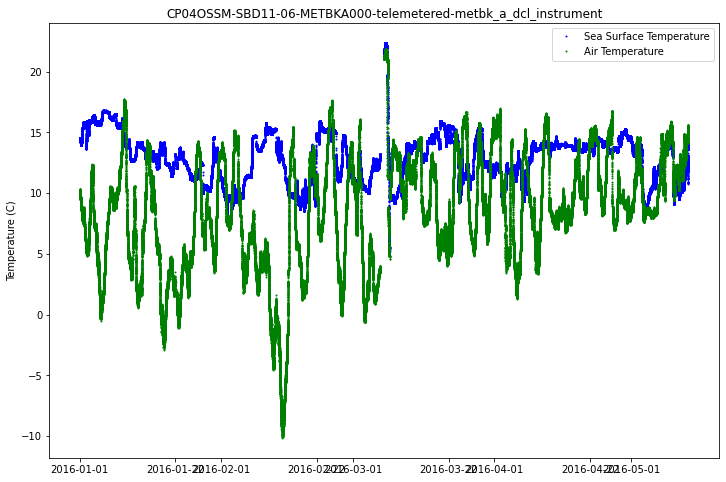

In [43]:

fig, (ax) = plt.subplots(1,1, figsize=(12,8))
plt.plot(ds['time'],ds['sea_surface_temperature'], 'b.', markersize=2, label='Sea Surface Temperature')
plt.plot(ds['time'],ds['air_temperature'], 'g.', markersize=2, label='Air Temperature')
plt.ylabel('Temperature (C)')
plt.title(source)
plt.legend();